Reinforcement Learning Pong Agent


In [ ]:
%pip install gymnasium
%pip install gymnasium[atari]
%pip install gymnasium[accept-rom-license]

Imports

In [14]:
import gymnasium as gym
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import random
import cv2
import matplotlib.pyplot as plt

Environment

In [ ]:
# create environment
env = gym.make("ALE/Pong-v5", render_mode="rgb_array")
# record video
env = gym.wrappers.RecordVideo(
    env, "data/train_videos", episode_trigger=lambda episode_id: True, video_length=0
)
# reset environment
action_space_n = env.action_space.n

Model

In [16]:
# hyperparameter
learning_rate = 0.0001
discount_factor = 0.99
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.01
batch_size = 64
num_episodes = 1000
#number of frames to skip
#frame_skip = 10


# model architecture
def create_model(action_space_n: int) -> models.Model:
    """Create a model with the given action space.

    Args:
        action_space_n (int): Number of actions.

    Returns:
        models.Model: Model with the given action space.
    """
    input_layer = layers.Input(shape=(84, 84, 4))
    conv1 = layers.Conv2D(32, (8, 8), strides=(4, 4), activation="relu")(input_layer)
    conv2 = layers.Conv2D(64, (4, 4), strides=(2, 2), activation="relu")(conv1)
    conv3 = layers.Conv2D(64, (3, 3), strides=(1, 1), activation="relu")(conv2)
    # flatten the conv output
    flatten = layers.Flatten()(conv3)
    dense1 = layers.Dense(512, activation="relu")(flatten)
    output_layer = layers.Dense(action_space_n, activation="linear")(dense1)
    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model


# agent initialization
model = create_model(action_space_n)
target_model = create_model(action_space_n)
target_model.set_weights(model.get_weights())

# optimizer and loss
optimizer = tf.keras.optimizers.Adam(learning_rate)
huber_loss = tf.keras.losses.Huber()


class ExperienceReplayBuffer:
    def __init__(self, capacity: int = 10000):
        self.capacity = capacity
        self.buffer = []
        self.position = 0

    def add(
        self,
        state: np.ndarray,
        action: int,
        reward: float,
        next_state: np.ndarray,
        done: bool,
    ):
        """Add a new experience to the buffer.

        Args:
            state (np.ndarray): state of the environment
            action (int): action taken in the state
            reward (float): reward received after taking the action
            next_state (np.ndarray): next state of the environment
            done (bool): whether the episode is done or not
        """
        if len(self.buffer) < self.capacity:
            self.buffer.append(None)
        self.buffer[self.position] = (state, action, reward, next_state, done)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size: int) -> list:
        """Sample a batch of experiences from the buffer.

        Args:
            batch_size (int): size of the batch to sample

        Returns:
            list: batch of experiences
        """
        return zip(*random.sample(self.buffer, batch_size))


# Preprocessing function for the state
def preprocess_state(state: np.ndarray) -> np.ndarray:
    """Preprocess the state.

    Args:
        state (np.ndarray): State to preprocess.

    Returns:
        np.ndarray: Preprocessed state.
    """
    gray_state = cv2.cvtColor(state, cv2.COLOR_RGB2GRAY)  # convert to grayscale
    resized_state = cv2.resize(gray_state, (84, 84))  # resize to 84x84
    return resized_state.astype(np.float32) / 255.0  # normalize


# plots
def plot_results(
    episode_rewards: list,
    episode_lengths: list,
    episode_losses: list,
    epsilon_values: list,
    save_path: str,
):
    """Plot the results of the training.

    Args:
        episode_rewards (list): episode_rewards
        episode_lengths (list): episode_lengths
        episode_losses (list): episode_losses
        epsilon_values (list): epsilon_values
        save_path (str): path to save the plot
    """
    plt.figure(figsize=(12, 10))

    plt.subplot(4, 1, 1)
    plt.plot(episode_rewards, label="Total Reward")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.legend()

    plt.subplot(4, 1, 2)
    plt.plot(episode_lengths, label="Episode Length")
    plt.xlabel("Episode")
    plt.ylabel("Length")
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(episode_losses, label="Loss")
    plt.xlabel("Episode")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.plot(epsilon_values, label="Epsilon")
    plt.xlabel("Episode")
    plt.ylabel("Epsilon")
    plt.legend()

    plt.tight_layout()

    # Save plot before showing
    plt.savefig(save_path)
    plt.show()

Training

Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-825.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-825.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-825.mp4
Episode 826 abgeschlossen mit 2850 Schritten, Gesamtbelohnung: -6.0, Epsilon: 0.015997113097568336
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-826.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-826.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-826.mp4
Episode 827 abgeschlossen mit 2032 Schritten, Gesamtbelohnung: -17.0, Epsilon: 0.015917127532080494
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-827.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-827.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-827.mp4
Episode 828 abgeschlossen mit 3329 Schritten, Gesamtbelohnung: 3.0, Epsilon: 0.01583754189442009
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-828.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-828.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-828.mp4
Episode 829 abgeschlossen mit 1954 Schritten, Gesamtbelohnung: -15.0, Epsilon: 0.01575835418494799
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-829.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-829.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-829.mp4
Episode 830 abgeschlossen mit 2946 Schritten, Gesamtbelohnung: -1.0, Epsilon: 0.01567956241402325
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-830.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-830.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-830.mp4
Episode 831 abgeschlossen mit 2958 Schritten, Gesamtbelohnung: -4.0, Epsilon: 0.015601164601953134
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-831.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-831.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-831.mp4
Episode 832 abgeschlossen mit 2218 Schritten, Gesamtbelohnung: 12.0, Epsilon: 0.015523158778943369
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-832.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-832.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-832.mp4
Episode 833 abgeschlossen mit 2665 Schritten, Gesamtbelohnung: 7.0, Epsilon: 0.015445542985048652
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-833.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-833.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-833.mp4
Episode 834 abgeschlossen mit 2908 Schritten, Gesamtbelohnung: -2.0, Epsilon: 0.015368315270123408
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-834.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-834.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-834.mp4
Episode 835 abgeschlossen mit 2981 Schritten, Gesamtbelohnung: -4.0, Epsilon: 0.01529147369377279
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-835.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-835.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-835.mp4
Episode 836 abgeschlossen mit 3164 Schritten, Gesamtbelohnung: -1.0, Epsilon: 0.015215016325303928
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-836.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-836.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-836.mp4
Episode 837 abgeschlossen mit 2888 Schritten, Gesamtbelohnung: 5.0, Epsilon: 0.015138941243677408
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-837.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-837.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-837.mp4
Episode 838 abgeschlossen mit 2654 Schritten, Gesamtbelohnung: 7.0, Epsilon: 0.01506324653745902
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-838.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-838.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-838.mp4
Episode 839 abgeschlossen mit 3122 Schritten, Gesamtbelohnung: 4.0, Epsilon: 0.014987930304771725
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-839.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-839.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-839.mp4
Episode 840 abgeschlossen mit 3560 Schritten, Gesamtbelohnung: -2.0, Epsilon: 0.014912990653247866
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-840.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-840.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-840.mp4
Episode 841 abgeschlossen mit 2868 Schritten, Gesamtbelohnung: -7.0, Epsilon: 0.014838425699981627
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-841.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-841.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-841.mp4
Episode 842 abgeschlossen mit 3220 Schritten, Gesamtbelohnung: 5.0, Epsilon: 0.01476423357148172
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-842.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-842.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-842.mp4
Episode 843 abgeschlossen mit 2451 Schritten, Gesamtbelohnung: -8.0, Epsilon: 0.014690412403624311
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-843.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-843.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-843.mp4
Episode 844 abgeschlossen mit 3072 Schritten, Gesamtbelohnung: 3.0, Epsilon: 0.01461696034160619
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-844.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-844.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-844.mp4
Episode 845 abgeschlossen mit 2910 Schritten, Gesamtbelohnung: 6.0, Epsilon: 0.014543875539898159
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-845.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-845.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-845.mp4
Episode 846 abgeschlossen mit 2447 Schritten, Gesamtbelohnung: -10.0, Epsilon: 0.014471156162198668
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-846.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-846.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-846.mp4
Episode 847 abgeschlossen mit 2766 Schritten, Gesamtbelohnung: 8.0, Epsilon: 0.014398800381387675
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-847.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-847.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-847.mp4
Episode 848 abgeschlossen mit 1941 Schritten, Gesamtbelohnung: -13.0, Epsilon: 0.014326806379480736
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-848.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-848.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-848.mp4
Episode 849 abgeschlossen mit 2557 Schritten, Gesamtbelohnung: -12.0, Epsilon: 0.014255172347583332
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-849.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-849.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-849.mp4
Episode 850 abgeschlossen mit 3240 Schritten, Gesamtbelohnung: 1.0, Epsilon: 0.014183896485845416


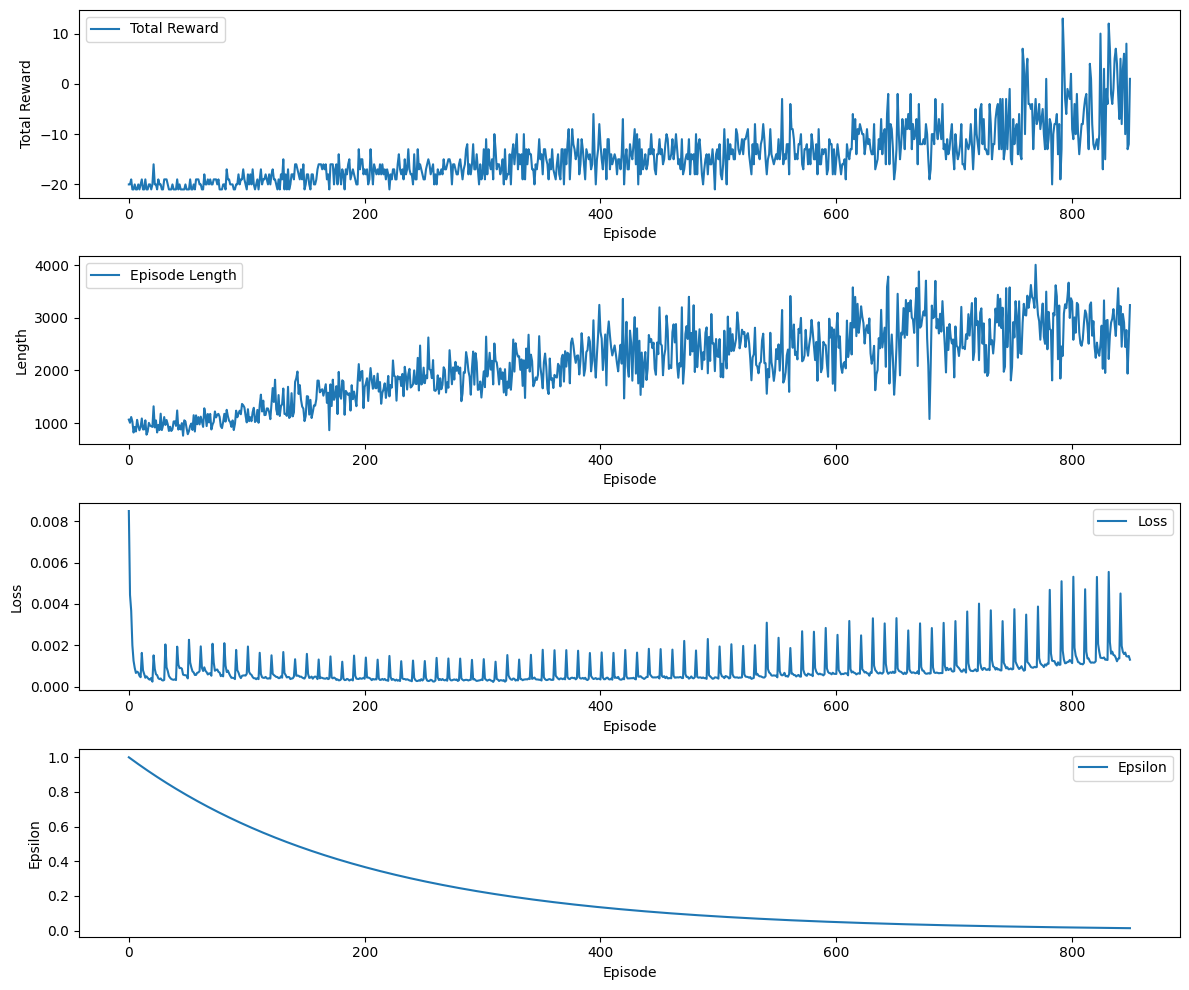

Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-850.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-850.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-850.mp4
Episode 851 abgeschlossen mit 3082 Schritten, Gesamtbelohnung: 1.0, Epsilon: 0.014112977003416188
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-851.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-851.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-851.mp4
Episode 852 abgeschlossen mit 2827 Schritten, Gesamtbelohnung: 5.0, Epsilon: 0.014042412118399107
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-852.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-852.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-852.mp4
Episode 853 abgeschlossen mit 3077 Schritten, Gesamtbelohnung: 5.0, Epsilon: 0.013972200057807112
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-853.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-853.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-853.mp4
Episode 854 abgeschlossen mit 2735 Schritten, Gesamtbelohnung: -9.0, Epsilon: 0.013902339057518077
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-854.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-854.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-854.mp4
Episode 855 abgeschlossen mit 2950 Schritten, Gesamtbelohnung: 4.0, Epsilon: 0.013832827362230486
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-855.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-855.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-855.mp4
Episode 856 abgeschlossen mit 2256 Schritten, Gesamtbelohnung: -13.0, Epsilon: 0.013763663225419333
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-856.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-856.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-856.mp4
Episode 857 abgeschlossen mit 3033 Schritten, Gesamtbelohnung: -4.0, Epsilon: 0.013694844909292236
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-857.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-857.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-857.mp4
Episode 858 abgeschlossen mit 2770 Schritten, Gesamtbelohnung: -12.0, Epsilon: 0.013626370684745774
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-858.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-858.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-858.mp4
Episode 859 abgeschlossen mit 2816 Schritten, Gesamtbelohnung: 6.0, Epsilon: 0.013558238831322046
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-859.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-859.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-859.mp4
Episode 860 abgeschlossen mit 3006 Schritten, Gesamtbelohnung: -1.0, Epsilon: 0.013490447637165436
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-860.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-860.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-860.mp4
Episode 861 abgeschlossen mit 2883 Schritten, Gesamtbelohnung: 7.0, Epsilon: 0.013422995398979608
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-861.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-861.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-861.mp4
Episode 862 abgeschlossen mit 2938 Schritten, Gesamtbelohnung: 1.0, Epsilon: 0.01335588042198471
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-862.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-862.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-862.mp4
Episode 863 abgeschlossen mit 3424 Schritten, Gesamtbelohnung: -2.0, Epsilon: 0.013289101019874787
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-863.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-863.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-863.mp4
Episode 864 abgeschlossen mit 2275 Schritten, Gesamtbelohnung: 11.0, Epsilon: 0.013222655514775413
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-864.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-864.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-864.mp4
Episode 865 abgeschlossen mit 2728 Schritten, Gesamtbelohnung: 7.0, Epsilon: 0.013156542237201536
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-865.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-865.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-865.mp4
Episode 866 abgeschlossen mit 2469 Schritten, Gesamtbelohnung: 12.0, Epsilon: 0.013090759526015528
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-866.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-866.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-866.mp4
Episode 867 abgeschlossen mit 2960 Schritten, Gesamtbelohnung: 3.0, Epsilon: 0.01302530572838545
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-867.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-867.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-867.mp4
Episode 868 abgeschlossen mit 3241 Schritten, Gesamtbelohnung: 2.0, Epsilon: 0.012960179199743523
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-868.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-868.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-868.mp4
Episode 869 abgeschlossen mit 2288 Schritten, Gesamtbelohnung: 13.0, Epsilon: 0.012895378303744804
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-869.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-869.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-869.mp4
Episode 870 abgeschlossen mit 2726 Schritten, Gesamtbelohnung: -11.0, Epsilon: 0.01283090141222608
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-870.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-870.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-870.mp4
Episode 871 abgeschlossen mit 2767 Schritten, Gesamtbelohnung: 6.0, Epsilon: 0.012766746905164949
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-871.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-871.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-871.mp4
Episode 872 abgeschlossen mit 2520 Schritten, Gesamtbelohnung: -6.0, Epsilon: 0.012702913170639124
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-872.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-872.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-872.mp4
Episode 873 abgeschlossen mit 2780 Schritten, Gesamtbelohnung: 9.0, Epsilon: 0.012639398604785928
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-873.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-873.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-873.mp4
Episode 874 abgeschlossen mit 2674 Schritten, Gesamtbelohnung: 7.0, Epsilon: 0.012576201611761997
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-874.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-874.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-874.mp4
Episode 875 abgeschlossen mit 2373 Schritten, Gesamtbelohnung: 14.0, Epsilon: 0.012513320603703188


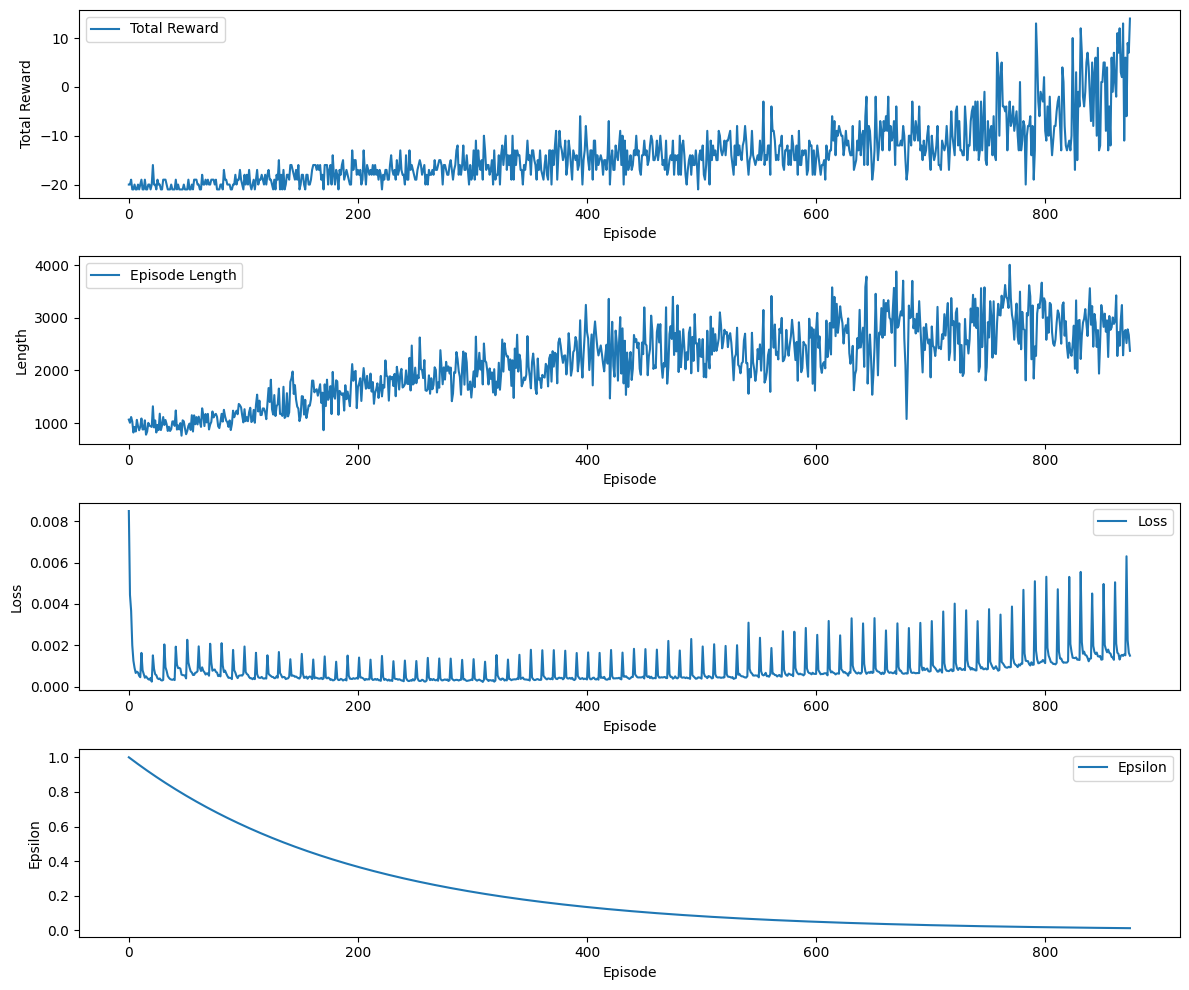

Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-875.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-875.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-875.mp4
Episode 876 abgeschlossen mit 2718 Schritten, Gesamtbelohnung: 5.0, Epsilon: 0.012450754000684672
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-876.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-876.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-876.mp4
Episode 877 abgeschlossen mit 2618 Schritten, Gesamtbelohnung: 11.0, Epsilon: 0.012388500230681249
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-877.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-877.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-877.mp4
Episode 878 abgeschlossen mit 2522 Schritten, Gesamtbelohnung: 7.0, Epsilon: 0.012326557729527843
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-878.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-878.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-878.mp4
Episode 879 abgeschlossen mit 3478 Schritten, Gesamtbelohnung: 3.0, Epsilon: 0.012264924940880204
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-879.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-879.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-879.mp4
Episode 880 abgeschlossen mit 3150 Schritten, Gesamtbelohnung: -1.0, Epsilon: 0.012203600316175803
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-880.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-880.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-880.mp4
Episode 881 abgeschlossen mit 2394 Schritten, Gesamtbelohnung: 13.0, Epsilon: 0.012142582314594924
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-881.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-881.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-881.mp4
Episode 882 abgeschlossen mit 2274 Schritten, Gesamtbelohnung: 13.0, Epsilon: 0.01208186940302195
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-882.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-882.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-882.mp4
Episode 883 abgeschlossen mit 2847 Schritten, Gesamtbelohnung: 8.0, Epsilon: 0.01202146005600684
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-883.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-883.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-883.mp4
Episode 884 abgeschlossen mit 2729 Schritten, Gesamtbelohnung: 8.0, Epsilon: 0.011961352755726806
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-884.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-884.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-884.mp4
Episode 885 abgeschlossen mit 2434 Schritten, Gesamtbelohnung: 12.0, Epsilon: 0.01190154599194817
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-885.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-885.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-885.mp4
Episode 886 abgeschlossen mit 2864 Schritten, Gesamtbelohnung: 4.0, Epsilon: 0.01184203826198843
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-886.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-886.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-886.mp4
Episode 887 abgeschlossen mit 3098 Schritten, Gesamtbelohnung: 1.0, Epsilon: 0.011782828070678488
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-887.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-887.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-887.mp4
Episode 888 abgeschlossen mit 2530 Schritten, Gesamtbelohnung: 12.0, Epsilon: 0.011723913930325095
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-888.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-888.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-888.mp4
Episode 889 abgeschlossen mit 2528 Schritten, Gesamtbelohnung: 12.0, Epsilon: 0.01166529436067347
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-889.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-889.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-889.mp4
Episode 890 abgeschlossen mit 3068 Schritten, Gesamtbelohnung: 4.0, Epsilon: 0.011606967888870102
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-890.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-890.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-890.mp4
Episode 891 abgeschlossen mit 2876 Schritten, Gesamtbelohnung: -6.0, Epsilon: 0.01154893304942575
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-891.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-891.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-891.mp4
Episode 892 abgeschlossen mit 2245 Schritten, Gesamtbelohnung: 14.0, Epsilon: 0.011491188384178622
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-892.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-892.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-892.mp4
Episode 893 abgeschlossen mit 3242 Schritten, Gesamtbelohnung: -1.0, Epsilon: 0.011433732442257729
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-893.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-893.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-893.mp4
Episode 894 abgeschlossen mit 3231 Schritten, Gesamtbelohnung: 1.0, Epsilon: 0.01137656378004644
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-894.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-894.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-894.mp4
Episode 895 abgeschlossen mit 2233 Schritten, Gesamtbelohnung: -10.0, Epsilon: 0.011319680961146208
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-895.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-895.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-895.mp4
Episode 896 abgeschlossen mit 2293 Schritten, Gesamtbelohnung: -9.0, Epsilon: 0.011263082556340478
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-896.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-896.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-896.mp4
Episode 897 abgeschlossen mit 2865 Schritten, Gesamtbelohnung: -4.0, Epsilon: 0.011206767143558775
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-897.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-897.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-897.mp4
Episode 898 abgeschlossen mit 3271 Schritten, Gesamtbelohnung: 2.0, Epsilon: 0.011150733307840981
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-898.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-898.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-898.mp4
Episode 899 abgeschlossen mit 2819 Schritten, Gesamtbelohnung: 7.0, Epsilon: 0.011094979641301777
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-899.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-899.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-899.mp4
Episode 900 abgeschlossen mit 3221 Schritten, Gesamtbelohnung: 4.0, Epsilon: 0.011039504743095268


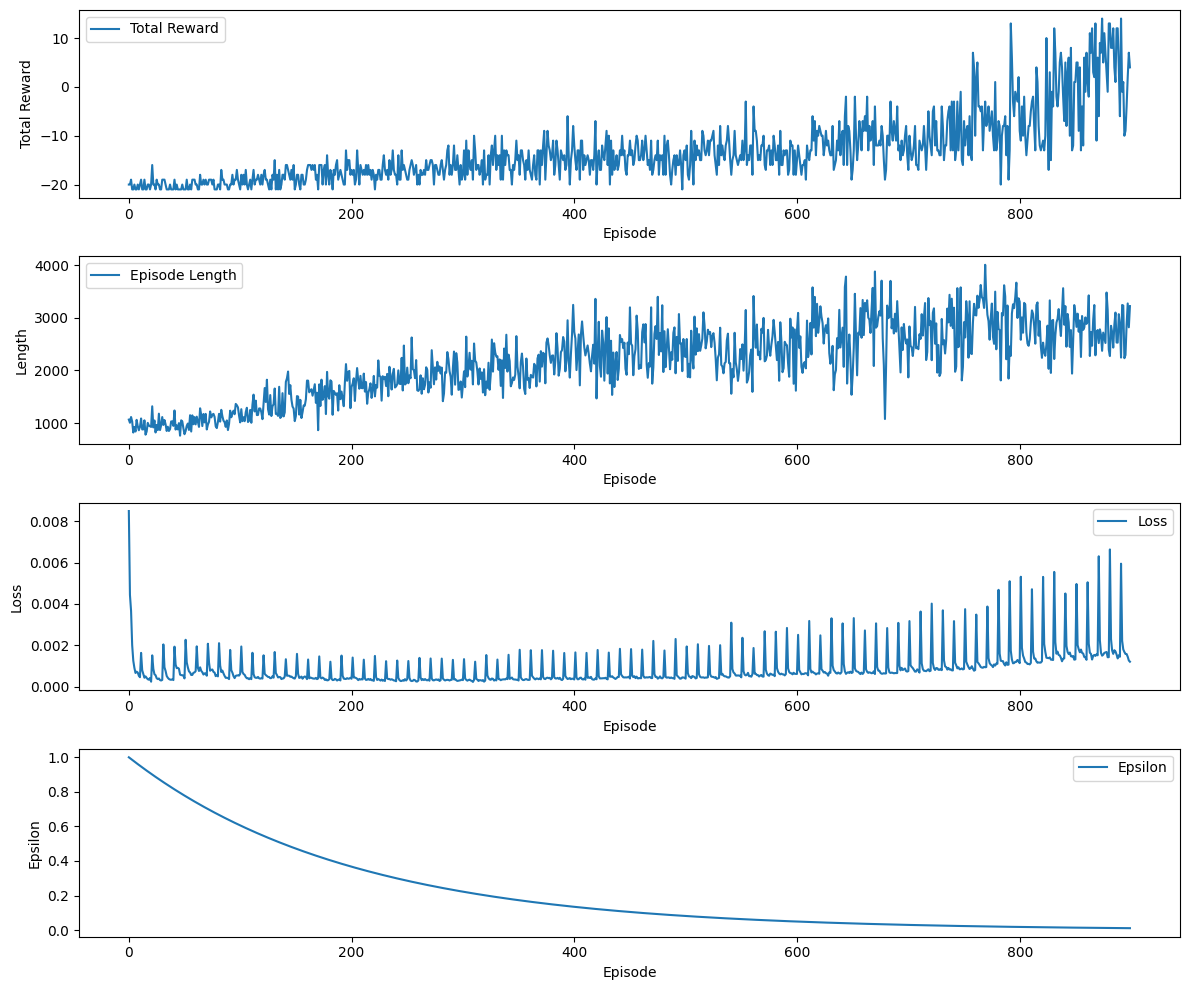

Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-900.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-900.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-900.mp4
Episode 901 abgeschlossen mit 3031 Schritten, Gesamtbelohnung: 4.0, Epsilon: 0.01098430721937979
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-901.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-901.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-901.mp4
Episode 902 abgeschlossen mit 2713 Schritten, Gesamtbelohnung: -7.0, Epsilon: 0.010929385683282892
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-902.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-902.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-902.mp4
Episode 903 abgeschlossen mit 1893 Schritten, Gesamtbelohnung: -13.0, Epsilon: 0.010874738754866477
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-903.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-903.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-903.mp4
Episode 904 abgeschlossen mit 3153 Schritten, Gesamtbelohnung: 4.0, Epsilon: 0.010820365061092144
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-904.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-904.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-904.mp4
Episode 905 abgeschlossen mit 2894 Schritten, Gesamtbelohnung: 5.0, Epsilon: 0.010766263235786683
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-905.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-905.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-905.mp4
Episode 906 abgeschlossen mit 3293 Schritten, Gesamtbelohnung: -1.0, Epsilon: 0.01071243191960775
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-906.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-906.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-906.mp4
Episode 907 abgeschlossen mit 3269 Schritten, Gesamtbelohnung: 1.0, Epsilon: 0.010658869760009713
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-907.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-907.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-907.mp4
Episode 908 abgeschlossen mit 2432 Schritten, Gesamtbelohnung: 10.0, Epsilon: 0.010605575411209664
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-908.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-908.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-908.mp4
Episode 909 abgeschlossen mit 2109 Schritten, Gesamtbelohnung: -12.0, Epsilon: 0.010552547534153616
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-909.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-909.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-909.mp4
Episode 910 abgeschlossen mit 2802 Schritten, Gesamtbelohnung: 2.0, Epsilon: 0.010499784796482848
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-910.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-910.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-910.mp4
Episode 911 abgeschlossen mit 2274 Schritten, Gesamtbelohnung: 13.0, Epsilon: 0.010447285872500434
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-911.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-911.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-911.mp4
Episode 912 abgeschlossen mit 2767 Schritten, Gesamtbelohnung: 4.0, Epsilon: 0.01039504944313793
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-912.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-912.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-912.mp4
Episode 913 abgeschlossen mit 2388 Schritten, Gesamtbelohnung: 8.0, Epsilon: 0.010343074195922241
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-913.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-913.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-913.mp4
Episode 914 abgeschlossen mit 2777 Schritten, Gesamtbelohnung: 7.0, Epsilon: 0.01029135882494263
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-914.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-914.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-914.mp4
Episode 915 abgeschlossen mit 2049 Schritten, Gesamtbelohnung: -13.0, Epsilon: 0.010239902030817916
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-915.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-915.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-915.mp4
Episode 916 abgeschlossen mit 2168 Schritten, Gesamtbelohnung: 14.0, Epsilon: 0.010188702520663827
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-916.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-916.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-916.mp4
Episode 917 abgeschlossen mit 2776 Schritten, Gesamtbelohnung: 6.0, Epsilon: 0.010137759008060509
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-917.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-917.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-917.mp4
Episode 918 abgeschlossen mit 2350 Schritten, Gesamtbelohnung: 10.0, Epsilon: 0.010087070213020206
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-918.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-918.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-918.mp4
Episode 919 abgeschlossen mit 2807 Schritten, Gesamtbelohnung: 3.0, Epsilon: 0.010036634861955105
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-919.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-919.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-919.mp4
Episode 920 abgeschlossen mit 2948 Schritten, Gesamtbelohnung: 1.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-920.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-920.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-920.mp4
Episode 921 abgeschlossen mit 1671 Schritten, Gesamtbelohnung: -16.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-921.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-921.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-921.mp4
Episode 922 abgeschlossen mit 2295 Schritten, Gesamtbelohnung: -9.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-922.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-922.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-922.mp4
Episode 923 abgeschlossen mit 3163 Schritten, Gesamtbelohnung: 4.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-923.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-923.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-923.mp4
Episode 924 abgeschlossen mit 2349 Schritten, Gesamtbelohnung: -10.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-924.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-924.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-924.mp4
Episode 925 abgeschlossen mit 2137 Schritten, Gesamtbelohnung: -12.0, Epsilon: 0.01


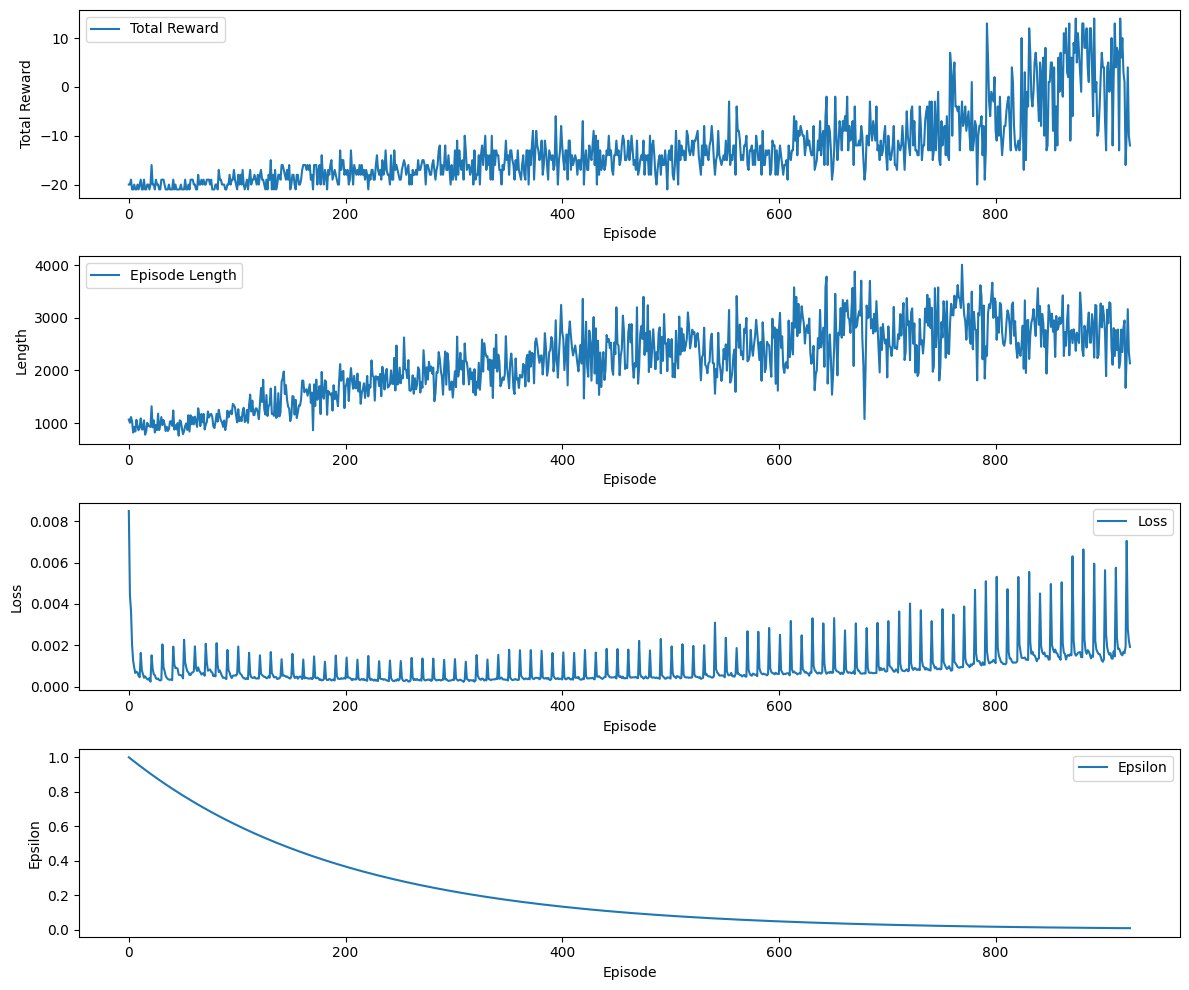

Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-925.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-925.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-925.mp4
Episode 926 abgeschlossen mit 2544 Schritten, Gesamtbelohnung: 8.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-926.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-926.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-926.mp4
Episode 927 abgeschlossen mit 2585 Schritten, Gesamtbelohnung: -9.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-927.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-927.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-927.mp4
Episode 928 abgeschlossen mit 2786 Schritten, Gesamtbelohnung: -7.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-928.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-928.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-928.mp4
Episode 929 abgeschlossen mit 2287 Schritten, Gesamtbelohnung: 14.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-929.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-929.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-929.mp4
Episode 930 abgeschlossen mit 2225 Schritten, Gesamtbelohnung: -10.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-930.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-930.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-930.mp4
Episode 931 abgeschlossen mit 2430 Schritten, Gesamtbelohnung: -5.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-931.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-931.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-931.mp4
Episode 932 abgeschlossen mit 2317 Schritten, Gesamtbelohnung: 10.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-932.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-932.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-932.mp4
Episode 933 abgeschlossen mit 2514 Schritten, Gesamtbelohnung: 9.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-933.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-933.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-933.mp4
Episode 934 abgeschlossen mit 2645 Schritten, Gesamtbelohnung: 9.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-934.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-934.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-934.mp4
Episode 935 abgeschlossen mit 2155 Schritten, Gesamtbelohnung: -15.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-935.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-935.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-935.mp4
Episode 936 abgeschlossen mit 2507 Schritten, Gesamtbelohnung: -11.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-936.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-936.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-936.mp4
Episode 937 abgeschlossen mit 1815 Schritten, Gesamtbelohnung: -15.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-937.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-937.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-937.mp4
Episode 938 abgeschlossen mit 3043 Schritten, Gesamtbelohnung: -1.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-938.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-938.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-938.mp4
Episode 939 abgeschlossen mit 2169 Schritten, Gesamtbelohnung: -9.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-939.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-939.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-939.mp4
Episode 940 abgeschlossen mit 2356 Schritten, Gesamtbelohnung: -10.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-940.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-940.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-940.mp4
Episode 941 abgeschlossen mit 2718 Schritten, Gesamtbelohnung: -8.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-941.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-941.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-941.mp4
Episode 942 abgeschlossen mit 2707 Schritten, Gesamtbelohnung: 7.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-942.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-942.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-942.mp4
Episode 943 abgeschlossen mit 2907 Schritten, Gesamtbelohnung: 3.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-943.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-943.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-943.mp4
Episode 944 abgeschlossen mit 2282 Schritten, Gesamtbelohnung: 13.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-944.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-944.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-944.mp4
Episode 945 abgeschlossen mit 2576 Schritten, Gesamtbelohnung: 8.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-945.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-945.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-945.mp4
Episode 946 abgeschlossen mit 2235 Schritten, Gesamtbelohnung: 14.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-946.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-946.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-946.mp4
Episode 947 abgeschlossen mit 2919 Schritten, Gesamtbelohnung: 2.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-947.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-947.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-947.mp4
Episode 948 abgeschlossen mit 2527 Schritten, Gesamtbelohnung: 9.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-948.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-948.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-948.mp4
Episode 949 abgeschlossen mit 2399 Schritten, Gesamtbelohnung: 12.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-949.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-949.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-949.mp4
Episode 950 abgeschlossen mit 2230 Schritten, Gesamtbelohnung: 14.0, Epsilon: 0.01


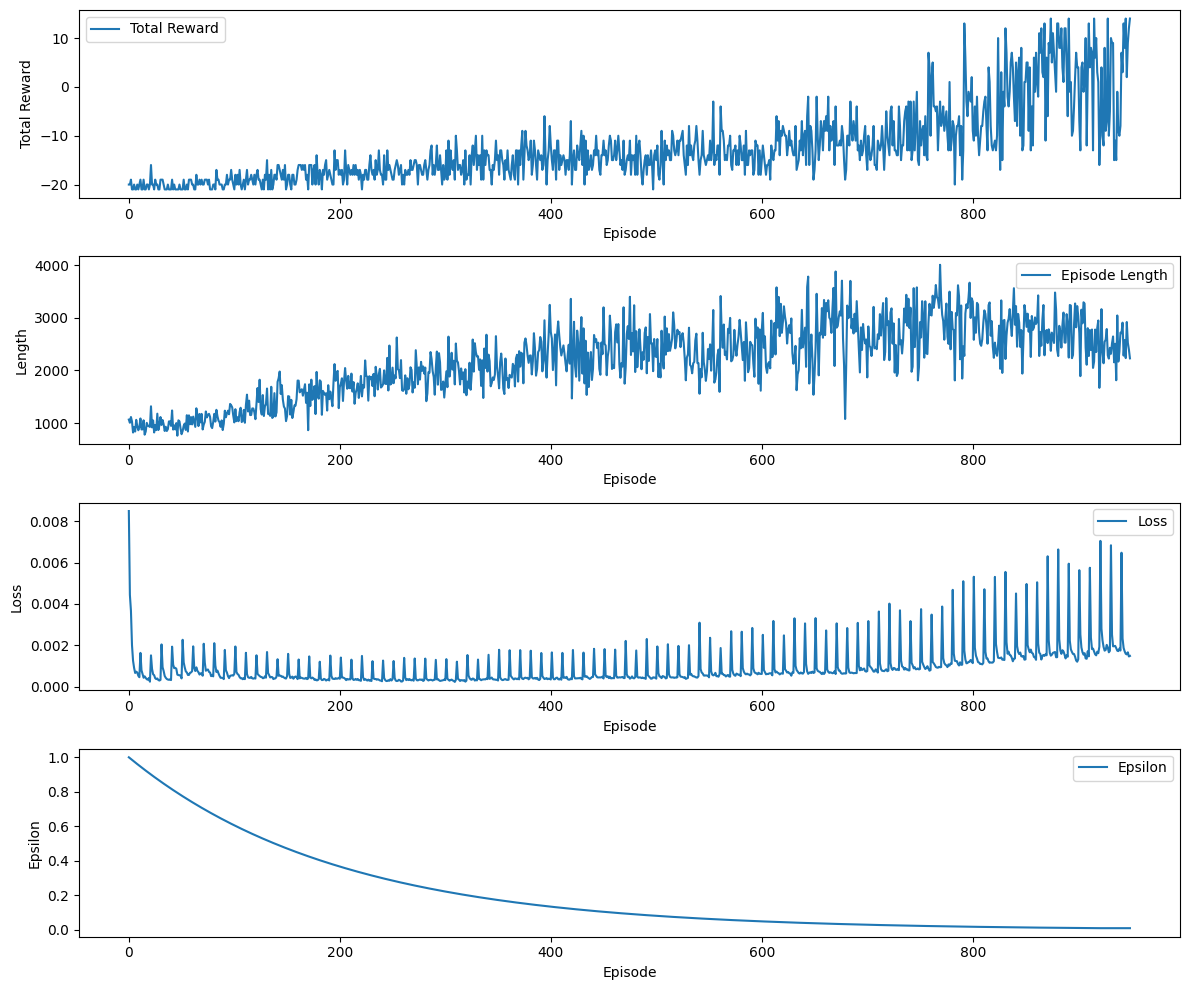

Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-950.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-950.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-950.mp4
Episode 951 abgeschlossen mit 2619 Schritten, Gesamtbelohnung: 13.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-951.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-951.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-951.mp4
Episode 952 abgeschlossen mit 2736 Schritten, Gesamtbelohnung: 11.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-952.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-952.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-952.mp4
Episode 953 abgeschlossen mit 2425 Schritten, Gesamtbelohnung: -12.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-953.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-953.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-953.mp4
Episode 954 abgeschlossen mit 3552 Schritten, Gesamtbelohnung: 2.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-954.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-954.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-954.mp4
Episode 955 abgeschlossen mit 3469 Schritten, Gesamtbelohnung: -1.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-955.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-955.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-955.mp4
Episode 956 abgeschlossen mit 2754 Schritten, Gesamtbelohnung: 8.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-956.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-956.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-956.mp4
Episode 957 abgeschlossen mit 2763 Schritten, Gesamtbelohnung: 6.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-957.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-957.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-957.mp4
Episode 958 abgeschlossen mit 2714 Schritten, Gesamtbelohnung: 6.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-958.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-958.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-958.mp4
Episode 959 abgeschlossen mit 2647 Schritten, Gesamtbelohnung: -9.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-959.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-959.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-959.mp4
Episode 960 abgeschlossen mit 3076 Schritten, Gesamtbelohnung: 2.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-960.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-960.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-960.mp4
Episode 961 abgeschlossen mit 3173 Schritten, Gesamtbelohnung: 2.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-961.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-961.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-961.mp4
Episode 962 abgeschlossen mit 2236 Schritten, Gesamtbelohnung: -9.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-962.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-962.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-962.mp4
Episode 963 abgeschlossen mit 2991 Schritten, Gesamtbelohnung: -4.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-963.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-963.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-963.mp4
Episode 964 abgeschlossen mit 2213 Schritten, Gesamtbelohnung: 12.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-964.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-964.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-964.mp4
Episode 965 abgeschlossen mit 1786 Schritten, Gesamtbelohnung: 18.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-965.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-965.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-965.mp4
Episode 966 abgeschlossen mit 2370 Schritten, Gesamtbelohnung: 8.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-966.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-966.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-966.mp4
Episode 967 abgeschlossen mit 2594 Schritten, Gesamtbelohnung: 7.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-967.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-967.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-967.mp4
Episode 968 abgeschlossen mit 2817 Schritten, Gesamtbelohnung: 5.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-968.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-968.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-968.mp4
Episode 969 abgeschlossen mit 2679 Schritten, Gesamtbelohnung: 5.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-969.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-969.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-969.mp4
Episode 970 abgeschlossen mit 2543 Schritten, Gesamtbelohnung: -3.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-970.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-970.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-970.mp4
Episode 971 abgeschlossen mit 2104 Schritten, Gesamtbelohnung: -9.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-971.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-971.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-971.mp4
Episode 972 abgeschlossen mit 2299 Schritten, Gesamtbelohnung: 13.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-972.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-972.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-972.mp4
Episode 973 abgeschlossen mit 3064 Schritten, Gesamtbelohnung: -1.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-973.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-973.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-973.mp4
Episode 974 abgeschlossen mit 3112 Schritten, Gesamtbelohnung: 2.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-974.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-974.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-974.mp4
Episode 975 abgeschlossen mit 2666 Schritten, Gesamtbelohnung: -6.0, Epsilon: 0.01


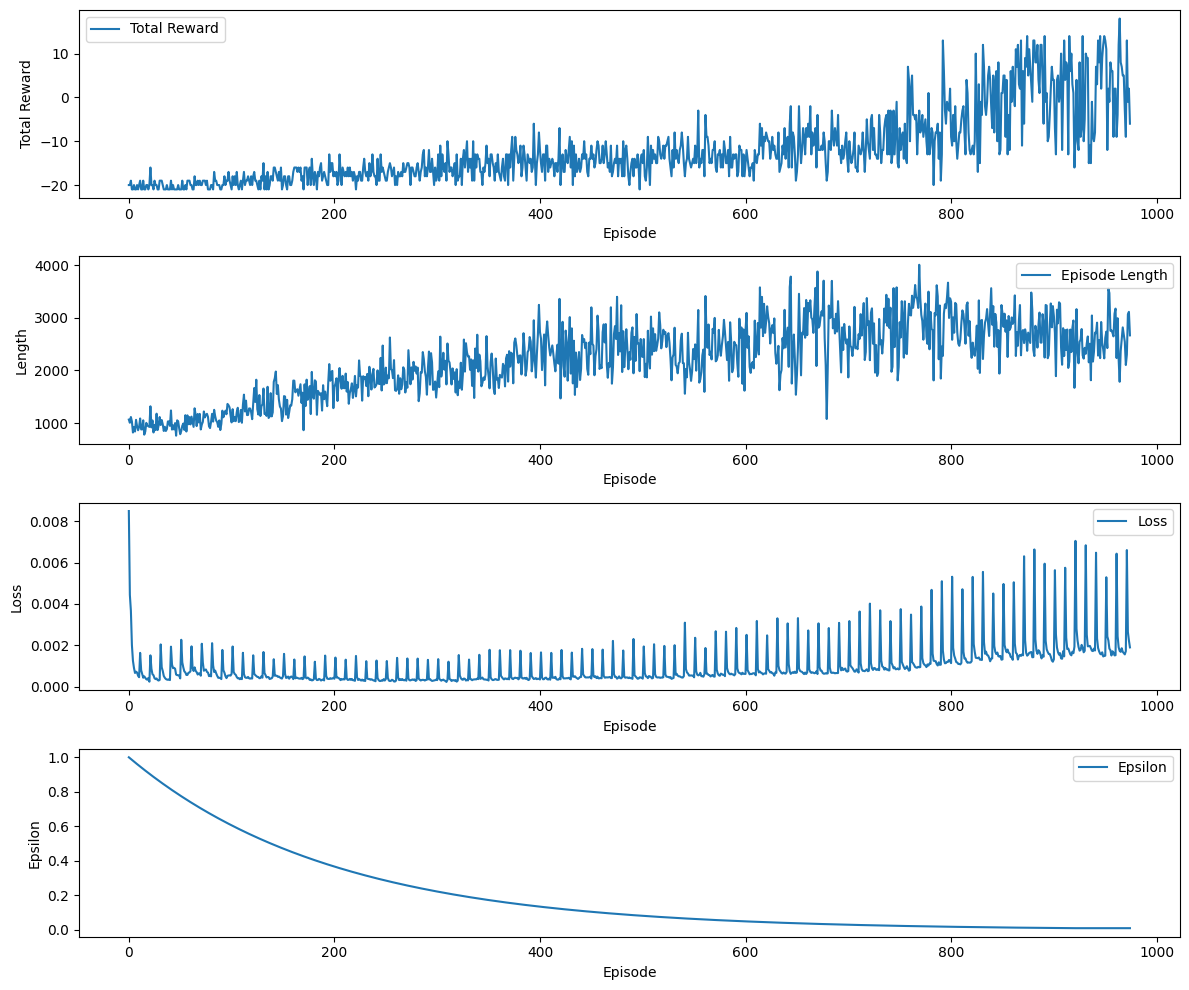

Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-975.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-975.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-975.mp4
Episode 976 abgeschlossen mit 2609 Schritten, Gesamtbelohnung: 9.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-976.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-976.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-976.mp4
Episode 977 abgeschlossen mit 2525 Schritten, Gesamtbelohnung: 7.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-977.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-977.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-977.mp4
Episode 978 abgeschlossen mit 2488 Schritten, Gesamtbelohnung: 8.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-978.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-978.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-978.mp4
Episode 979 abgeschlossen mit 2359 Schritten, Gesamtbelohnung: 11.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-979.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-979.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-979.mp4
Episode 980 abgeschlossen mit 3267 Schritten, Gesamtbelohnung: 3.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-980.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-980.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-980.mp4
Episode 981 abgeschlossen mit 2551 Schritten, Gesamtbelohnung: 10.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-981.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-981.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-981.mp4
Episode 982 abgeschlossen mit 2095 Schritten, Gesamtbelohnung: -13.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-982.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-982.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-982.mp4
Episode 983 abgeschlossen mit 2138 Schritten, Gesamtbelohnung: -11.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-983.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-983.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-983.mp4
Episode 984 abgeschlossen mit 2436 Schritten, Gesamtbelohnung: -9.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-984.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-984.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-984.mp4
Episode 985 abgeschlossen mit 2807 Schritten, Gesamtbelohnung: -6.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-985.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-985.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-985.mp4
Episode 986 abgeschlossen mit 2082 Schritten, Gesamtbelohnung: -14.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-986.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-986.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-986.mp4
Episode 987 abgeschlossen mit 2602 Schritten, Gesamtbelohnung: -7.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-987.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-987.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-987.mp4
Episode 988 abgeschlossen mit 2389 Schritten, Gesamtbelohnung: -8.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-988.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-988.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-988.mp4
Episode 989 abgeschlossen mit 3094 Schritten, Gesamtbelohnung: -1.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-989.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-989.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-989.mp4
Episode 990 abgeschlossen mit 2689 Schritten, Gesamtbelohnung: -5.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-990.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-990.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-990.mp4
Episode 991 abgeschlossen mit 2431 Schritten, Gesamtbelohnung: -8.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-991.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-991.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-991.mp4
Episode 992 abgeschlossen mit 3092 Schritten, Gesamtbelohnung: -2.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-992.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-992.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-992.mp4
Episode 993 abgeschlossen mit 2438 Schritten, Gesamtbelohnung: -5.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-993.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-993.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-993.mp4
Episode 994 abgeschlossen mit 2259 Schritten, Gesamtbelohnung: -9.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-994.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-994.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-994.mp4
Episode 995 abgeschlossen mit 2129 Schritten, Gesamtbelohnung: -11.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-995.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-995.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-995.mp4
Episode 996 abgeschlossen mit 2103 Schritten, Gesamtbelohnung: -9.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-996.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-996.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-996.mp4
Episode 997 abgeschlossen mit 1971 Schritten, Gesamtbelohnung: -12.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-997.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-997.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-997.mp4
Episode 998 abgeschlossen mit 3116 Schritten, Gesamtbelohnung: 3.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-998.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-998.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-998.mp4
Episode 999 abgeschlossen mit 2398 Schritten, Gesamtbelohnung: -11.0, Epsilon: 0.01
Moviepy - Building video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-999.mp4.
Moviepy - Writing video c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-999.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\nicho\Downloads\Alex RL Training\videos\rl-video-episode-999.mp4
Episode 1000 abgeschlossen mit 2207 Schritten, Gesamtbelohnung: -11.0, Epsilon: 0.01


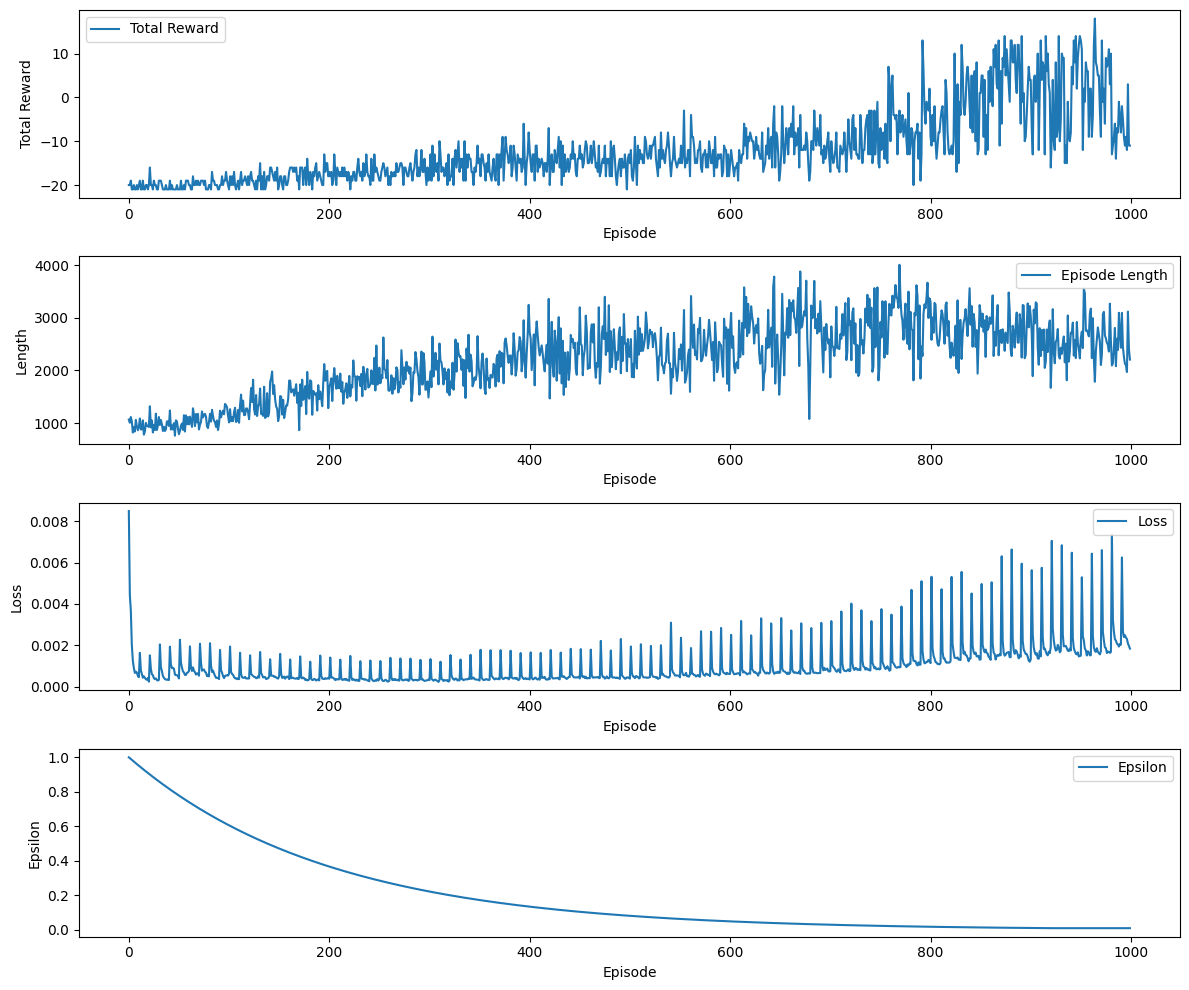

In [6]:
# training metrics
episode_rewards = []
episode_lengths = []
episode_losses = []
epsilon_values = []

buffer = ExperienceReplayBuffer()
best_reward = -float("inf")

# training loop
for episode in range(num_episodes):
    env.reset()
    state, info = env.reset()
    state = preprocess_state(state)
    state = np.stack([state] * 4, axis=2)
    done = False
    total_reward = 0
    step = 0
    losses = []

    while not done:
        # Epsilon-Greedy Policy
        if np.random.rand() <= epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(model.predict(np.expand_dims(state, axis=0), verbose=0))

        # Frame skipping logic
        # for _ in range(frame_skip):
        #    next_state, reward, done, truncated, info = env.step(action)
        #    done = done or truncated
        #    total_reward += reward
        #    if done:
        #        break

        # Preprocess next state
        next_state, reward, done, truncated, info = env.step(action)
        done = done or truncated

        next_state = preprocess_state(next_state)
        next_state = np.append(
            state[:, :, 1:], np.expand_dims(next_state, axis=2), axis=2
        )

        # reward clipping
        total_reward += reward

        # add experience to buffer
        buffer.add(state, action, reward, next_state, done)

        # update state
        state = next_state
        step += 1

        # sample from buffer and train model
        if len(buffer.buffer) > batch_size:
            states, actions, rewards, next_states, dones = buffer.sample(batch_size)

            # Q-Learning
            future_rewards = target_model.predict(np.array(next_states), verbose=0)
            dones = np.array(dones, dtype=int)

            updated_q_values = rewards + discount_factor * np.max(
                future_rewards, axis=1
            ) * (1 - dones)

            masks = tf.one_hot(actions, action_space_n)  # create masks

            # create loss function and calculate gradients
            with tf.GradientTape() as tape:
                q_values = model(np.array(states))
                q_action = tf.reduce_sum(tf.multiply(q_values, masks), axis=1)
                loss = huber_loss(updated_q_values, q_action)
                losses.append(loss.numpy())

            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # print(f"Episode: {episode + 1}, Step: {step}, Step Reward: {reward}, Total Reward: {total_reward}, Epsilon: {epsilon}")

    episode_rewards.append(total_reward)  # append total reward to list
    episode_lengths.append(step)  # append step to list
    episode_losses.append(np.mean(losses))  # append loss to list
    epsilon_values.append(epsilon)  # append epsilon to list

    print(
        f"Episode {episode + 1} abgeschlossen mit {step} Schritten, Gesamtbelohnung: {total_reward}, Epsilon: {epsilon}"
    )

    # update target model every 10 episodes
    if episode % 10 == 0:
        target_model.set_weights(model.get_weights())

    # update epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # save best model
    if total_reward > best_reward:
        best_reward = total_reward
        model.save("models/best_pong_v5_rl_model.keras")

    # save model every 100 episodes
    if (episode + 1) % 100 == 0:
        model.save(f"models/pong_v5_rl_model_episode_{episode + 1}.keras")

    # plot results every 25 episodes
    if (episode + 1) % 25 == 0:
        plot_results(
            episode_rewards,
            episode_lengths,
            episode_losses,
            epsilon_values,
            save_path=f"data/plots/pong_Plot_episode_{episode + 1}.png",
        )

# save final model
model.save("models/pong_rl_model.keras")  # save model

Evaluation

In [9]:
# evaluation plot
def plot_eval(episode_rewards: list, episode_lengths: list, eval_path: str):
    """Plot the evaluation results.

    Args:
        episode_rewards (list): rewards per episode
        episode_lengths (list): steps per episode
        eval_path (str): path to save the plot
    """

    plt.figure(figsize=(12, 10))

    plt.subplot(2, 1, 1)
    plt.plot(episode_rewards, label="Total Reward")
    plt.axhline(y=np.mean(episode_rewards), color="r", linestyle="--", label="Mean Reward")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.legend()

    # plot episode lengths
    plt.subplot(2, 1, 2)
    plt.plot(episode_lengths, label="Episode Length")
    plt.xlabel("Episode")
    plt.ylabel("Length")
    plt.legend()

    plt.tight_layout()

    # save plot
    plt.savefig(eval_path)
    
    # show plot
    plt.show()

Moviepy - Building video c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-0.mp4
Total Reward: -3.0, Steps: 3024
Moviepy - Building video c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-1.mp4.
Moviepy - Writing video c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-1.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-1.mp4
Total Reward: -4.0, Steps: 3534
Moviepy - Building video c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-2.mp4.
Moviepy - Writing video c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-2.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-2.mp4
Total Reward: 6.0, Steps: 3061
Moviepy - Building video c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-3.mp4.
Moviepy - Writing video c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-3.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-3.mp4
Total Reward: 7.0, Steps: 2756
Moviepy - Building video c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-4.mp4.
Moviepy - Writing video c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-4.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-4.mp4
Total Reward: 3.0, Steps: 2927
Moviepy - Building video c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-5.mp4.
Moviepy - Writing video c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-5.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-5.mp4
Total Reward: 5.0, Steps: 2686
Moviepy - Building video c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-6.mp4.
Moviepy - Writing video c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-6.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-6.mp4
Total Reward: 8.0, Steps: 2768
Moviepy - Building video c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-7.mp4.
Moviepy - Writing video c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-7.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-7.mp4
Total Reward: 6.0, Steps: 3031
Moviepy - Building video c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-8.mp4.
Moviepy - Writing video c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-8.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-8.mp4
Total Reward: 12.0, Steps: 2536
Moviepy - Building video c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-9.mp4.
Moviepy - Writing video c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-9.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\alexp\OneDrive\Studium\6_Semester\Reinforcement_Learning\RL\data\eval_videos\rl-video-episode-9.mp4
Total Reward: -10.0, Steps: 2630


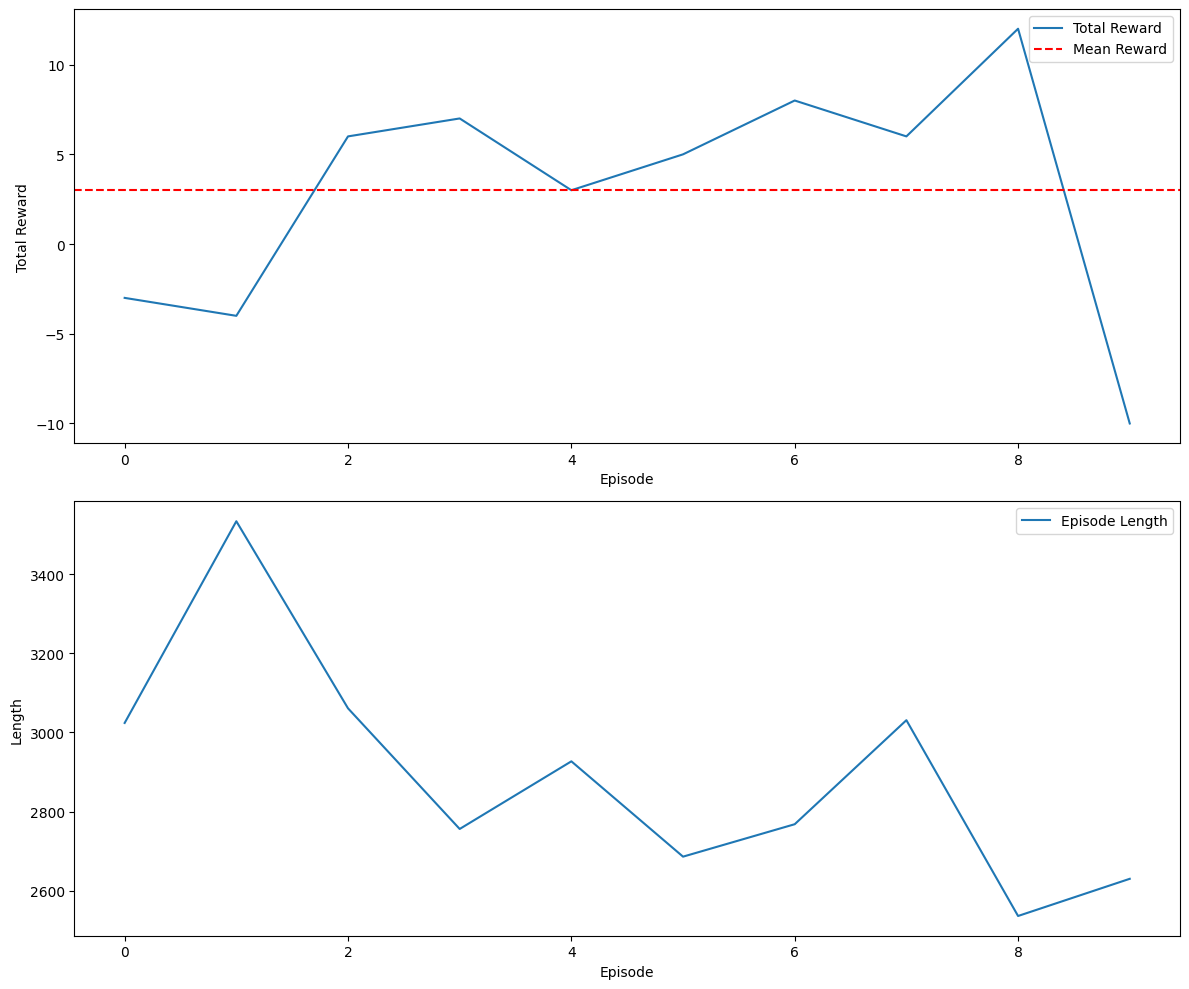

Durchschnittliche Belohnung über 10 Episoden: 3.0


In [19]:
# load model
model = load_model("models/pong_v5_rl_model_episode_900.keras")
# create environment for evaluation
eval_env = gym.make("ALE/Pong-v5", render_mode="rgb_array")
eval_env = gym.wrappers.RecordVideo(
    eval_env, "data/eval_videos", episode_trigger=lambda episode_id: True, video_length=0
)
episode_rewards = []
episode_lengths = []

for episode in range(10):
    total_reward = 0
    step = 0
    state, info = eval_env.reset()
    state = preprocess_state(state)
    state = np.stack([state] * 4, axis=2)
    done = False
    while not done:
        action = np.argmax(model.predict(np.expand_dims(state, axis=0), verbose=0))
        next_state, reward, done, truncated, info = eval_env.step(action)
        done = done or truncated
        total_reward += reward
        next_state = preprocess_state(next_state)
        next_state = np.append(
            state[:, :, 1:], np.expand_dims(next_state, axis=2), axis=2
        )
        state = next_state
        step += 1
    episode_rewards.append(total_reward)
    episode_lengths.append(step)
    # print results
    print(f"Total Reward: {total_reward}, Steps: {step}")

    # plot results
    if (episode + 1) % 10 == 0:
        plot_eval(
            episode_rewards,
            episode_lengths,
            eval_path="data/plots/eval_plot2.png",
        )

# calculate average reward
avg_reward = np.mean(episode_rewards)

# print average reward
print("Durchschnittliche Belohnung über", "10", "Episoden:", avg_reward)